## Zadanie 11 — (5p) 
Pobierz plik Auto.csv. 
1. Wczytaj go jako DataFrame i zmień kolumnę
origin na typ category. Podziel dane na zbiór treningowy i walidacyjny.
2. Użyj biblioteki statsmodels do wykonania regresji liniowej z mpg jako zmienną ob-
jaśnianą, a horsepower jako predyktorem (np. metoda OLS). Wyjaśnij informacje
zwracane przez metodę model.summary(), w szczególności: przedziały ufności, p-
values, T-statistic, F-statistic i R2. Możesz się wzorować na tej analizie w Jupyter
notebook.
3. Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich
zmiennych w zbiorze danych. Możesz użyć pandas.plotting.scatter_matrix(...).
Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji corr() dla Data-
Frame z biblioteki pandas.
4. Przeprowadź regresję liniową z mpg jako zmienną objaśnianą i wszystkimi innymi
zmiennymi (z wyjątkiem name) jako predyktorami. Spróbuj zdefiniować różne modele
wykorzystując biblioteką patsy i używając symboli +, *, : oraz różnych transformacji
zmiennych, takich jak na przykład I(np.log(X)) lub I(np.sqrt(X)). Co to jest błąd
generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?
5. Spróbuj znaleźć wartości odstające (ang. outliers) i usuń je ze zbioru danych. Możesz
wykorzystać np. wykres reszt (ang. residual plot) albo Z-Score. Czym są punkty
o wysokiej dźwigni (ang. high leverage points)? Jak możesz je wykryć (np. zobacz
tutaj)? Ponownie wytrenuj swoje modele na oczyszczonych danych i porównaj wyniki.
Pamiętaj, że usuwając obserwacje ze zbioru danych powinieneś mieć silne przesłanki,
że zawierają one nieprawidłowe informacje. Usuwanie obserwacji tylko dlatego, że nie
są podobne do innych nie jest dobrym pomysłem.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np


In [6]:
auto = pd.read_csv('Auto.csv')
auto['origin'] = auto['origin'].astype('category')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['weight'] = pd.to_numeric(auto['weight'], errors='coerce')
auto = auto.dropna()

auto.head(10)

train_df, val_df = train_test_split(auto, test_size=0.2, random_state=42)

Użyj biblioteki statsmodels do wykonania regresji liniowej z mpg jako zmienną ob-
jaśnianą, a horsepower jako predyktorem (np. metoda OLS). Wyjaśnij informacje
zwracane przez metodę model.summary(), w szczególności: przedziały ufności, p-
values, T-statistic, F-statistic i R2. Możesz się wzorować na tej analizie w Jupyter
notebook.

In [7]:
# Add a constant to the predictor variable
X = sm.add_constant(train_df['horsepower'].astype(float))

# Fit the regression model
model = sm.OLS(train_df['mpg'], X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     490.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           6.36e-66
Time:                        09:08:31   Log-Likelihood:                -944.56
No. Observations:                 313   AIC:                             1893.
Df Residuals:                     311   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6061      0.817     49.682      0.0

Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich
zmiennych w zbiorze danych. Możesz użyć pandas.plotting.scatter_matrix(...).
Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji corr() dla Data-
Frame z biblioteki pandas.

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

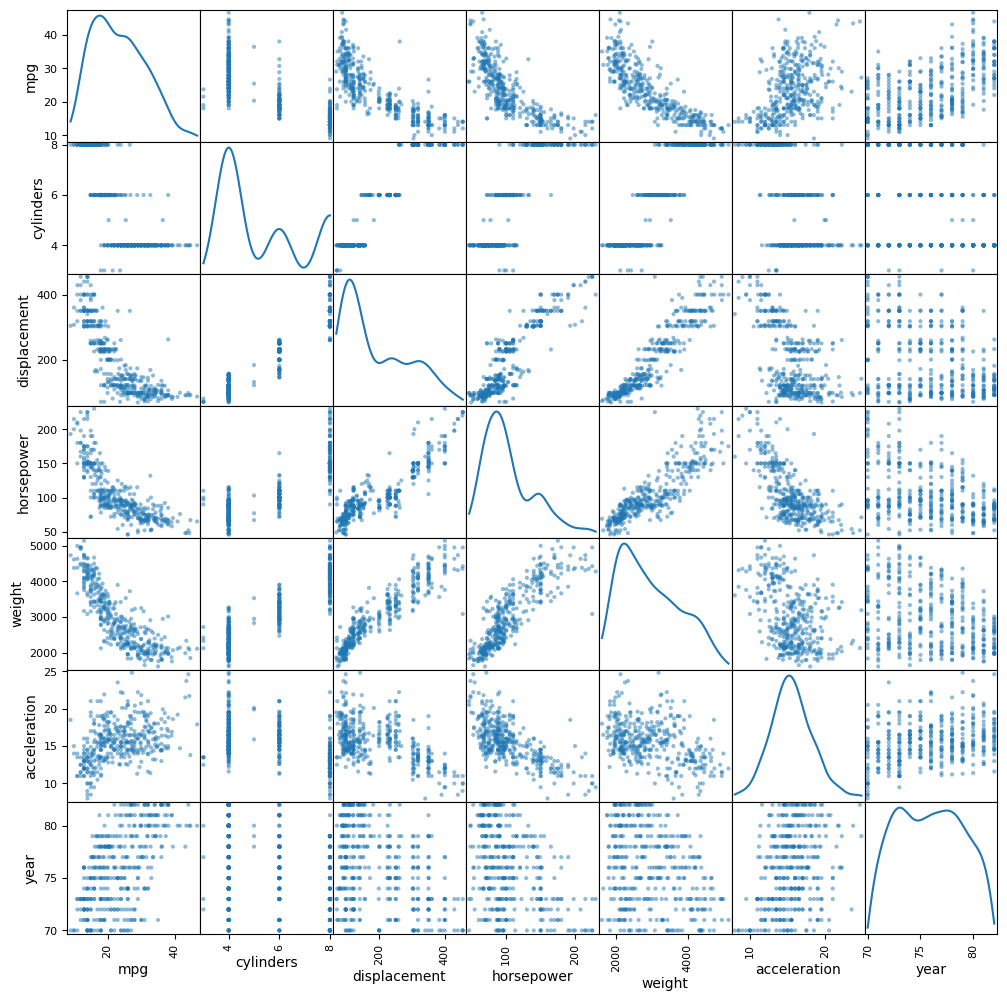

In [13]:
# Exclude the 'name' column from the dataframe
auto_numeric = auto.drop(columns=['name'])

pd.plotting.scatter_matrix(auto_numeric, figsize=(12, 12), diagonal='kde')

correlation_matrix = auto_numeric.corr()
print(correlation_matrix)

Przeprowadź regresję liniową z mpg jako zmienną objaśnianą i wszystkimi innymi
zmiennymi (z wyjątkiem name) jako predyktorami. Spróbuj zdefiniować różne modele
wykorzystując biblioteką patsy i używając symboli +, *, : oraz różnych transformacji
zmiennych, takich jak na przykład I(np.log(X)) lub I(np.sqrt(X)). Co to jest błąd
generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?

In [ ]:
import patsy
from sklearn.metrics import mean_squared_error

# Define different models using patsy
models = {
    'model1': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
    'model2': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(weight))',
    'model3': 'mpg ~ cylinders * displacement + horsepower * weight + acceleration * year + origin',
    'model4': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(horsepower))',
    'model5': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(displacement))',
    'model6': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(weight))',
    'model7': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(acceleration))',
    'model8': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(year))',
    'model9': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(cylinders))',
    'model10': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(displacement))',
    'model11': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(horsepower))',
    'model12': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(acceleration))',
    'model13': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(year))',
    'model14': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(cylinders))',
    'model15': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(weight)) + I(np.sqrt(horsepower))',
    'model16': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(displacement)) + I(np.sqrt(weight))',
    'model17': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(acceleration)) + I(np.sqrt(year))',
    'model18': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(cylinders)) + I(np.sqrt(displacement))',
    'model19': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(horsepower)) + I(np.sqrt(acceleration))',
    'model20': 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(year)) + I(np.sqrt(cylinders))',
    'model21': 'mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin',
    'model22': 'mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin',
    'model23': 'mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin',
    'model24': 'mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin',
    'model25': 'mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin',
    'model26': 'mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin'
}

# Fit the models and calculate the generalization error
results = {}
for name, formula in models.items():
    y_train, X_train = patsy.dmatrices(formula, train_df, return_type='dataframe')
    y_val, X_val = patsy.dmatrices(formula, val_df, return_type='dataframe')
    
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    results[name] = {'model': model, 'mse': mse}

# Print the results
for name, result in results.items():
    print(f"{name}: MSE = {result['mse']}")
    #print(result['model'].summary())

model1: MSE = 10.602279011690936
model2: MSE = 9.035138226972084
model3: MSE = 7.969831498437311
model4: MSE = 9.636547197961033
model5: MSE = 9.832857451627918
model6: MSE = 9.019739738928699
model7: MSE = 9.907621629362115
model8: MSE = 9.144638273601087
model9: MSE = 10.324822337783086
model10: MSE = 9.631734133254039
model11: MSE = 9.608414107338405
model12: MSE = 9.83306406244732
model13: MSE = 9.13878188054839
model14: MSE = 10.249601619651468
model15: MSE = 9.168243988660855
model16: MSE = 9.162394210168793
model17: MSE = 8.739947454348808
model18: MSE = 9.79216849984688
model19: MSE = 9.463934213910587
model20: MSE = 8.865791576426478
model21: MSE = 10.602279011690806
model22: MSE = 10.315140608834815
model23: MSE = 9.687838245788399
model24: MSE = 9.072467884465915
model25: MSE = 8.584853933035427
model26: MSE = 15.602892417736525
